## 0. Wczytywanie danych

In [150]:
import pandas as pd
import numpy as np
import gdown
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
gdown.download("https://drive.google.com/uc?id=1C7Eme7C3eHdz3XyqV1nAgtuJj1CA0dDC")
df = pd.read_csv("zad2_wum_data.csv", sep=";")
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1C7Eme7C3eHdz3XyqV1nAgtuJj1CA0dDC
To: /content/zad2_wum_data.csv
100%|██████████| 14.6M/14.6M [00:00<00:00, 55.9MB/s]


   Class     Output    Input1    Input2    Input3    Input4    Input5  \
0      0   0.800586 -0.002583  2.184037 -0.322008  1.621241  1.192444   
1      0   2.168475  0.668637  1.373933 -0.476868 -0.724704  0.031162   
2      1  -1.210777 -0.681438 -0.544753  0.441346 -0.019906 -0.192135   
3      1   0.505678 -0.497957  0.720712  0.149120  0.019251  1.377850   
4      1 -10.281033 -1.178544  0.176941  1.112202  1.234189  0.999451   

     Input6    Input7    Input8  ...  Input391  Input392  Input393  Input394  \
0 -0.278356 -0.207366  0.735689  ... -2.140861  1.187660  0.345238 -0.844885   
1 -1.845921  0.784890  1.508526  ... -1.286120 -0.900044 -0.500399 -0.126421   
2 -0.162510 -0.998777  0.686472  ... -0.391605 -0.190147  0.793746 -0.812737   
3  0.981337 -0.846813  0.036790  ... -0.176734 -0.947351 -0.888601  1.509450   
4 -0.773329 -0.811075  1.550537  ... -0.181325  0.198960 -0.697497 -0.836371   

   Input395  Input396  Input397  Input398  Input399  Input400  
0  0.580007 -2.6

## 1. Modele bazowe

In [152]:
# Zmienne wejściowe (400 cech)
X = df.drop(columns=['Class', 'Output'])

# Zmienne wyjściowe dla klasyfikacji
y_class = df['Class']

# Zmienne wyjściowe dla regresji
y_output = df['Output']

In [153]:
X

Input1    Input2    Input3    Input4    Input5    Input6    Input7  \
0    -0.002583  2.184037 -0.322008  1.621241  1.192444 -0.278356 -0.207366   
1     0.668637  1.373933 -0.476868 -0.724704  0.031162 -1.845921  0.784890   
2    -0.681438 -0.544753  0.441346 -0.019906 -0.192135 -0.162510 -0.998777   
3    -0.497957  0.720712  0.149120  0.019251  1.377850  0.981337 -0.846813   
4    -1.178544  0.176941  1.112202  1.234189  0.999451 -0.773329 -0.811075   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.893128  2.081556  0.796121  0.436108 -0.849635  1.129482  1.432813   
1996  0.048336  0.770285 -0.354350 -1.557706 -0.182954 -0.665730  0.322526   
1997  1.404051 -0.061405  0.180448 -0.362992  0.826353 -0.066654  0.987946   
1998 -0.474238 -1.288631 -0.326170 -0.275383 -0.315331 -1.225622 -0.656750   
1999  1.535949  0.644094 -1.287768 -0.191350  0.167755 -0.534574  0.220055   

        Input8    Input9   Input10  ...  Input391  Input392  Input393  \
0     0.735689 -2.160335 -1.502765  ... -2.140861  1.187660  0.345238   
1     1.508526 -0.830589 -0.084441  ... -1.286120 -0.900044 -0.500399   
2     0.686472 -1.761005 -1.613247  ... -0.391605 -0.190147  0.793746   
3     0.036790  1.778232 -0.523618  ... -0.176734 -0.947351 -0.888601   
4     1.550537  2.011470 -2.434608  ... -0.181325  0.198960 -0.697497   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.438694 -0.706348 -0.613768  ... -0.474294  0.039143  1.808243   
1996  0.658221  1.558515 -0.493098  ...  1.087032  0.095401  0.301200   
1997 -1.266302 -0.881202 -0.423927  ...  1.011431  0.458901 -0.220498   
1998  0.777151  0.848154 -0.479303  ... -1.146012 -0.031477 -2.461869   
1999 -0.501486 -0.288896 -1.105449  ... -1.201860  0.409375 -0.440580   

      Input394  Input395  Input396  Input397  Input398  Input399  Input400  
0    -0.844885  0.580007 -2.605781 -0.299471  0.711487 -0.753316  0.728763  
1    -0.126421 -0.632233 -2.557419  0.056044  0.634774 -0.259835  0.106390  
2    -0.812737 -0.068228 -0.313143  2.564096  0.848355  0.180556 -1.525615  
3     1.509450 -0.501929 -0.554909 -0.104051  0.442150 -0.056644  1.447267  
4    -0.836371  1.652071  0.974292  1.584071 -0.202352  1.362426  1.023857  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -0.034847 -1.314878 -1.235939  1.010456 -2.186403 -0.157829  0.738539  
1996  1.776995 -2.045261 -1.931008 -0.683551  0.000835 -0.671151 -0.945843  
1997  0.004950 -1.928972 -1.574129  1.421012 -0.736559 -0.540174 -1.182067  
1998  1.037240  0.366076 -0.541171 -0.126733 -0.265069 -0.080381  0.166985  
1999  1.040116  0.429276 -0.875186 -0.889635  0.315779  1.698054  0.903791  

[2000 rows x 400 columns]

In [154]:
# Standaryzacja, nie jest konieczna. Dane zostały ustandaryzowane (mają średnią 0 i odchylenie standardowe 1).
# Sprawdziłem faktycznie to nic nie zmienia.

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled)

### 1.1 Regresja liniowa

In [155]:
model = LinearRegression() # model regresji liniowej

# Walidacja krzyżowa
r2_scores = cross_val_score(model, X, y_output, cv=5, scoring='r2')
print("Regresja liniowa – średnie R² (5-krotna walidacja):", np.mean(r2_scores))

# Trening modelu
model.fit(X, y_output)
y_pred_reg = model.predict(X)
print("Regresja liniowa – R² na zbiorze treningowym:", r2_score(y_output, y_pred_reg))

Regresja liniowa – średnie R² (5-krotna walidacja): 0.34228035764705034
Regresja liniowa – R² na zbiorze treningowym: 0.6079625367893318


### 1.2 Regresja logistyczna

In [156]:
def RegresjaLogistyczna(X, y):
    model = LogisticRegression(max_iter=1000) #model regresji logistycznej

    # Walidacja krzyżowa
    acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Regresja logistyczna – średnia dokładność (accuracy) (5-krotna walidacja):", np.mean(acc_scores))

    # Trening modelu
    model.fit(X, y)
    y_pred_class = model.predict(X)
    print("Regresja logistyczna – dokładność na zbiorze treningowym:", accuracy_score(y, y_pred_class))

    # Macierz pomyłek i raport klasyfikacji
    print("\nMacierz pomyłek:")
    print(confusion_matrix(y, y_pred_class))
    print("\nRaport klasyfikacji:")
    print(classification_report(y, y_pred_class))

RegresjaLogistyczna(X, y_class)

Regresja logistyczna – średnia dokładność (accuracy) (5-krotna walidacja): 0.542
Regresja logistyczna – dokładność na zbiorze treningowym: 0.71

Macierz pomyłek:
[[691 296]
 [284 729]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       987
           1       0.71      0.72      0.72      1013

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



### 1.3 Komentarz

**Regresja liniowa:**
- $R^2$ na zbiorze treningowym pokazuje, jak dobrze model odwzorowuje zmienną `output`.
- Średnia $R^2$ z walidacji krzyżowej pokazuje, jak dobrze model generalizuje.
- Jeżeli $R^2$ znacząco spada w cross-validacji, wskazuje to wówczas na overfitting.

**Regresja logistyczna:**

- Dokładność na zbiorze treningowym wskazuje, jak dobrze model klasyfikuje znane dane. Średnia dokładność z walidacji krzyżowej pozwala oszacować zdolność modelu do generalizacji. Różnica między nimi sugeruje, czy model może być przeuczony. Widać, że dokładność na treningu jest wyraźnie wyższa niż w walidacji, co świadczy o przeuczeniu się modelu.

## 2. Zaawansowana klasyfikacja

### 2.1 Naiwny trening z optuną na wszystkich cechach wykorzystując XGBoost

In [247]:
!pip install optuna xgboost --quiet

In [259]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

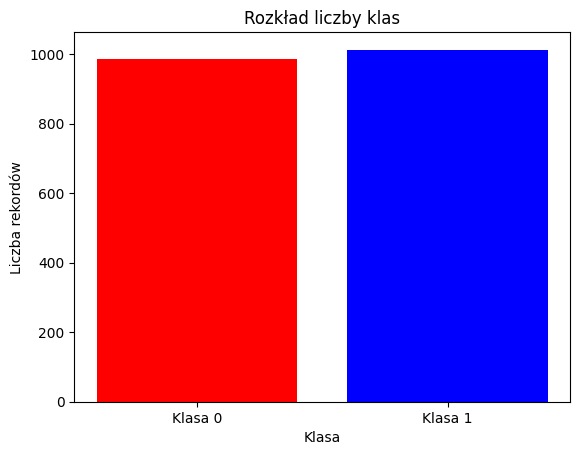

In [315]:
# Wizualizacji liczby klas
counts = y_class.value_counts()
plt.bar(counts.index, counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Klasa 0', 'Klasa 1'])
plt.title("Rozkład liczby klas")
plt.xlabel("Klasa")
plt.ylabel("Liczba rekordów")
plt.show()

In [249]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

In [250]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [252]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2025-05-22 18:19:06,867] A new study created in memory with name: no-name-53bb7fe3-0f4e-4e30-8f56-e838065f808a
[I 2025-05-22 18:19:39,420] Trial 0 finished with value: 0.6862446800786072 and parameters: {'n_estimators': 234, 'max_depth': 8, 'learning_rate': 0.08120158288153466, 'subsample': 0.9643210871316847, 'colsample_bytree': 0.7480050168049753, 'gamma': 2.287643324756692, 'reg_alpha': 3.998047728385354, 'reg_lambda': 3.591409393867824}. Best is trial 0 with value: 0.6862446800786072.
[I 2025-05-22 18:20:14,432] Trial 1 finished with value: 0.6925009310594402 and parameters: {'n_estimators': 215, 'max_depth': 6, 'learning_rate': 0.023947920897629472, 'subsample': 0.8720818011727725, 'colsample_bytree': 0.8897731896485747, 'gamma': 3.153758932605359, 'reg_alpha': 2.4106738710069324, 'reg_lambda': 1.5469398502639586}. Best is trial 1 with value: 0.6925009310594402.
[I 2025-05-22 18:21:02,057] Trial 2 finished with value: 0.6831282660276905 and parameters: {'n_estimators': 418, 'ma

In [253]:
best_params = study.best_params
best_params["use_label_encoder"] = False
best_params["eval_metric"] = "logloss"

print("\nNajlepsze parametry:", best_params)

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDokładność końcowa XGBoost (Optuna): {accuracy:.4f}")


Najlepsze parametry: {'n_estimators': 319, 'max_depth': 8, 'learning_rate': 0.012557137781367812, 'subsample': 0.9004494973692299, 'colsample_bytree': 0.8217900230088068, 'gamma': 2.735235919337403, 'reg_alpha': 3.6980554255470324, 'reg_lambda': 0.07532109810359733, 'use_label_encoder': False, 'eval_metric': 'logloss'}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Dokładność końcowa XGBoost (Optuna): 0.7100


===========================Raport klasyfikacji===========================

              precision    recall  f1-score   support

           0       0.74      0.64      0.68       197
           1       0.69      0.78      0.73       203

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400
 



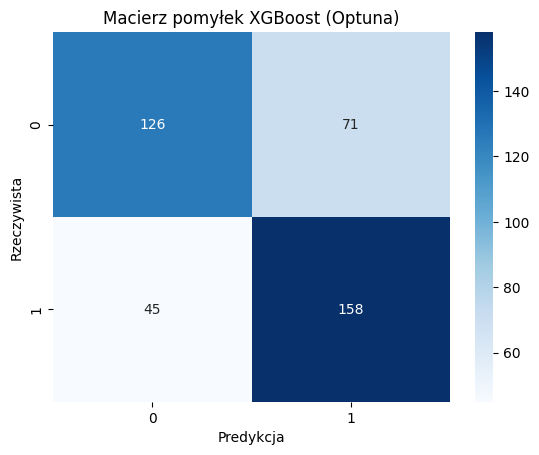

<Figure size 1000x600 with 0 Axes>

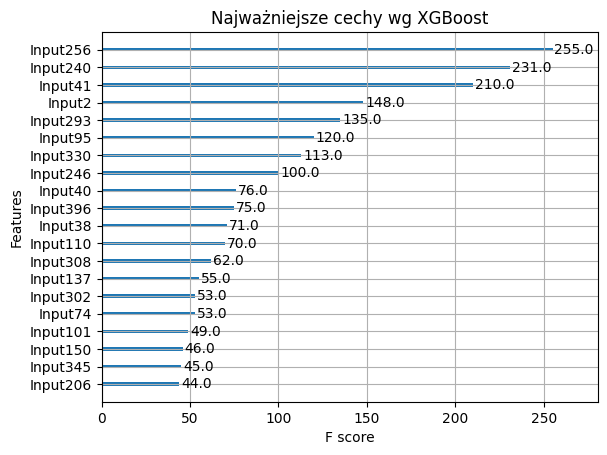

Wybrane cechy (ważność > 0.005): ['Input2', 'Input101', 'Input240', 'Input256', 'Input293', 'Input330']


In [254]:
print("===========================Raport klasyfikacji===========================\n")
print(classification_report(y_test, y_pred), "\n")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Macierz pomyłek XGBoost (Optuna)")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista")
plt.show()

# Ważność cech
plt.figure(figsize=(10, 6))
plot_importance(best_model, max_num_features=20)
plt.title("Najważniejsze cechy wg XGBoost")
plt.show()

# Selekcja cech
importances = best_model.feature_importances_
selected_features = X.columns[importances > 0.005]
print("Wybrane cechy (ważność > 0.005):", list(selected_features))

### 2.2 Ogląd i wybór cech do treningu najlepszego modelu

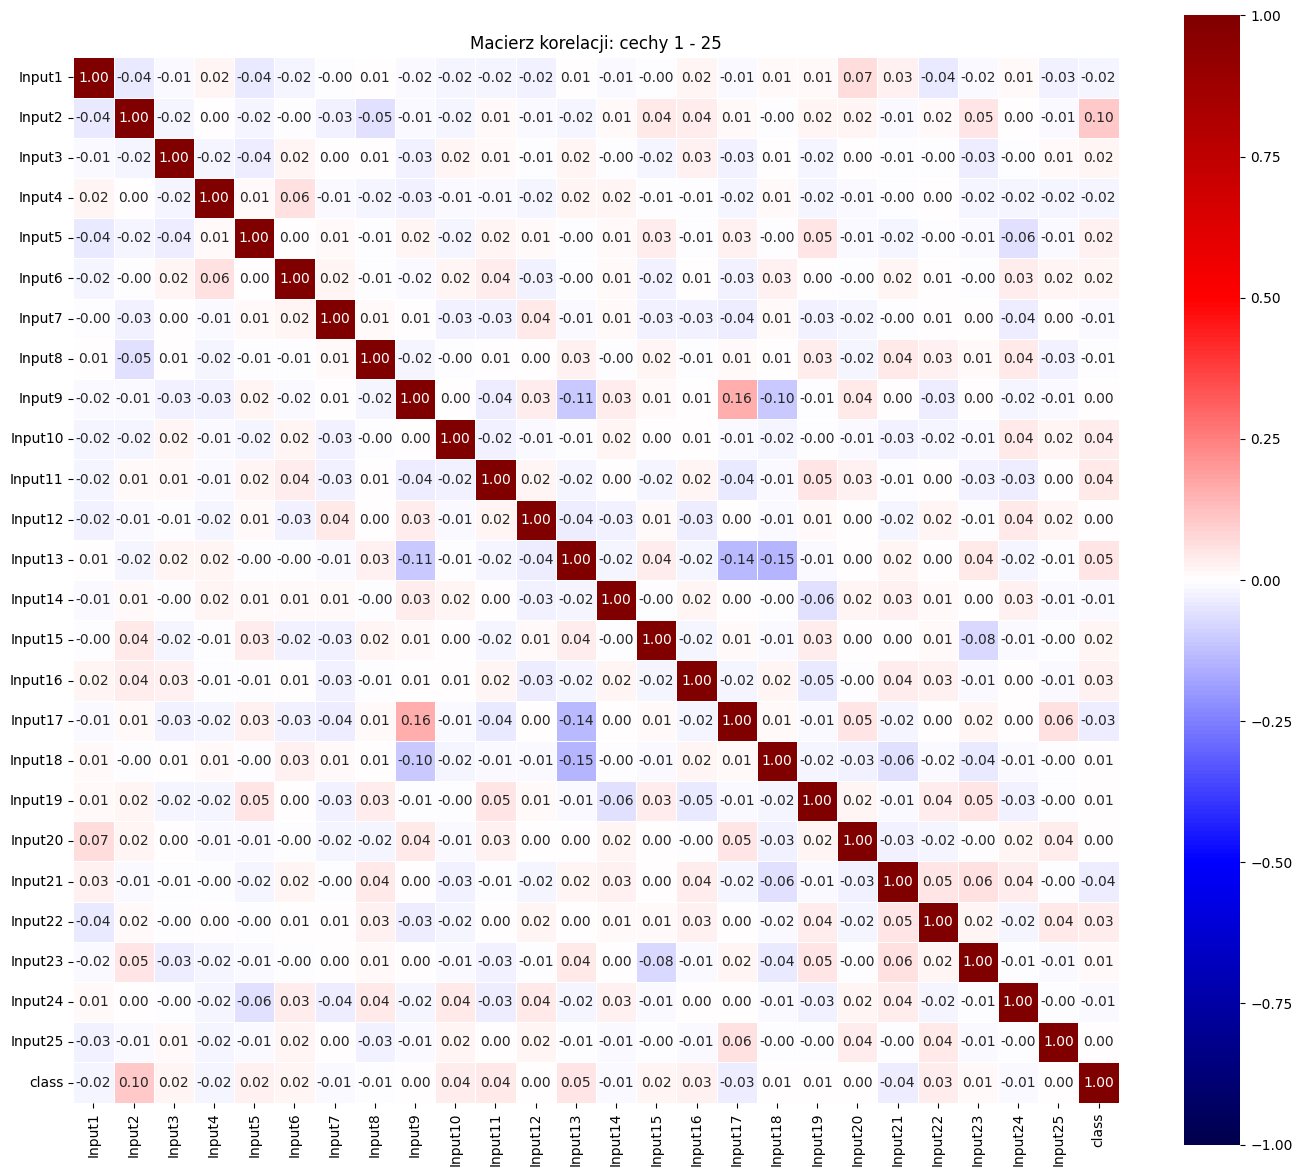

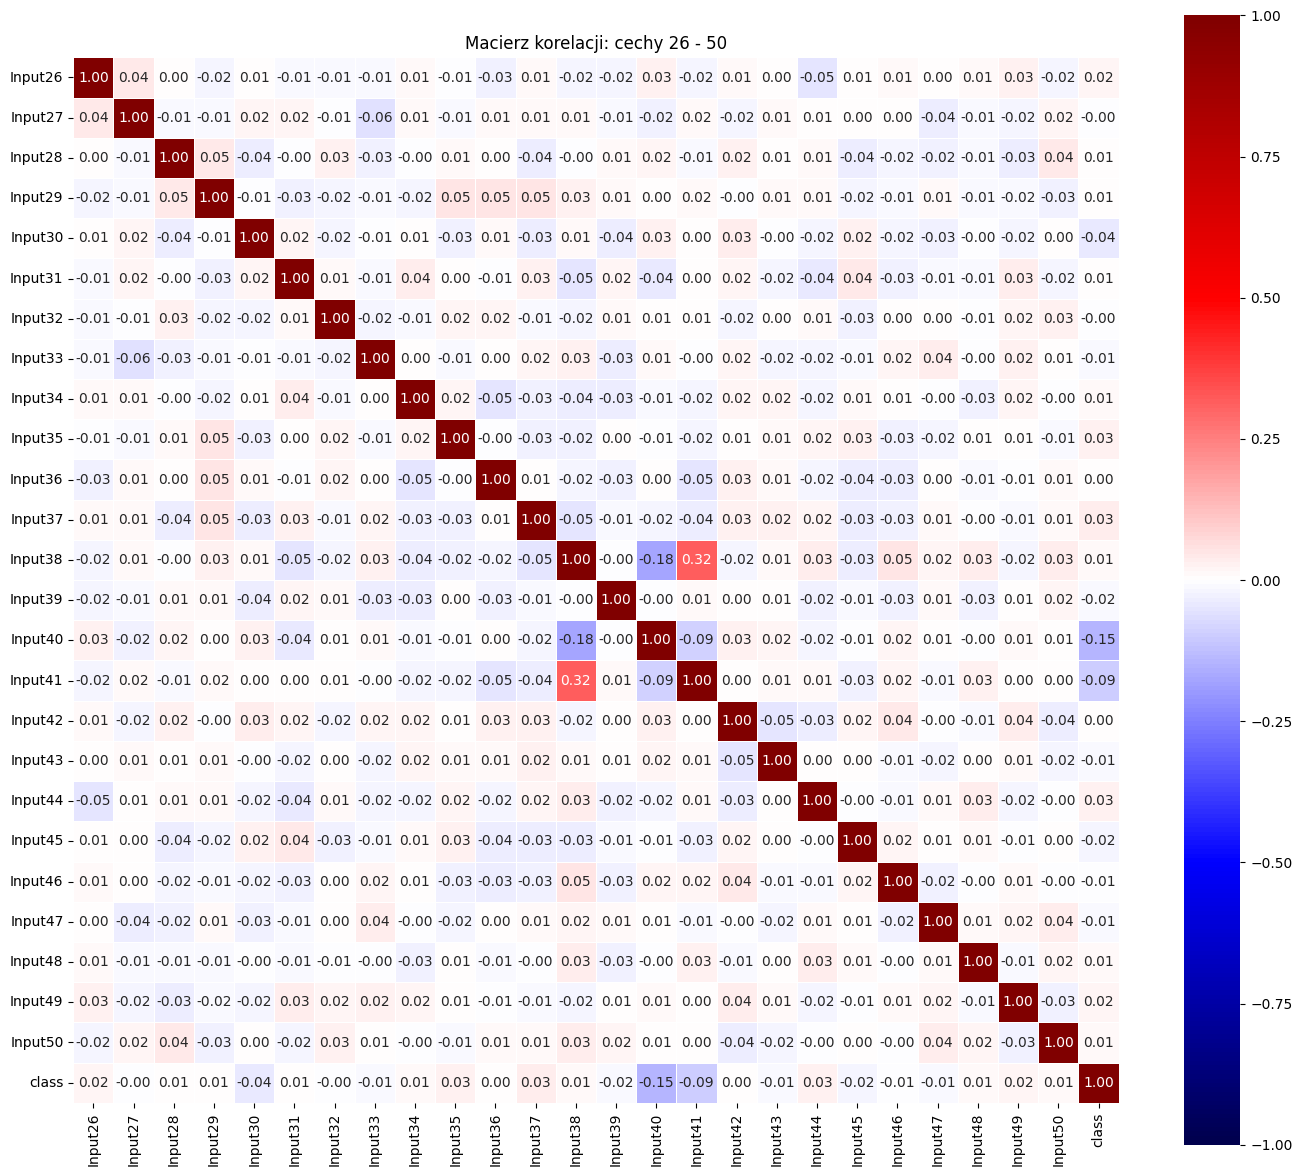

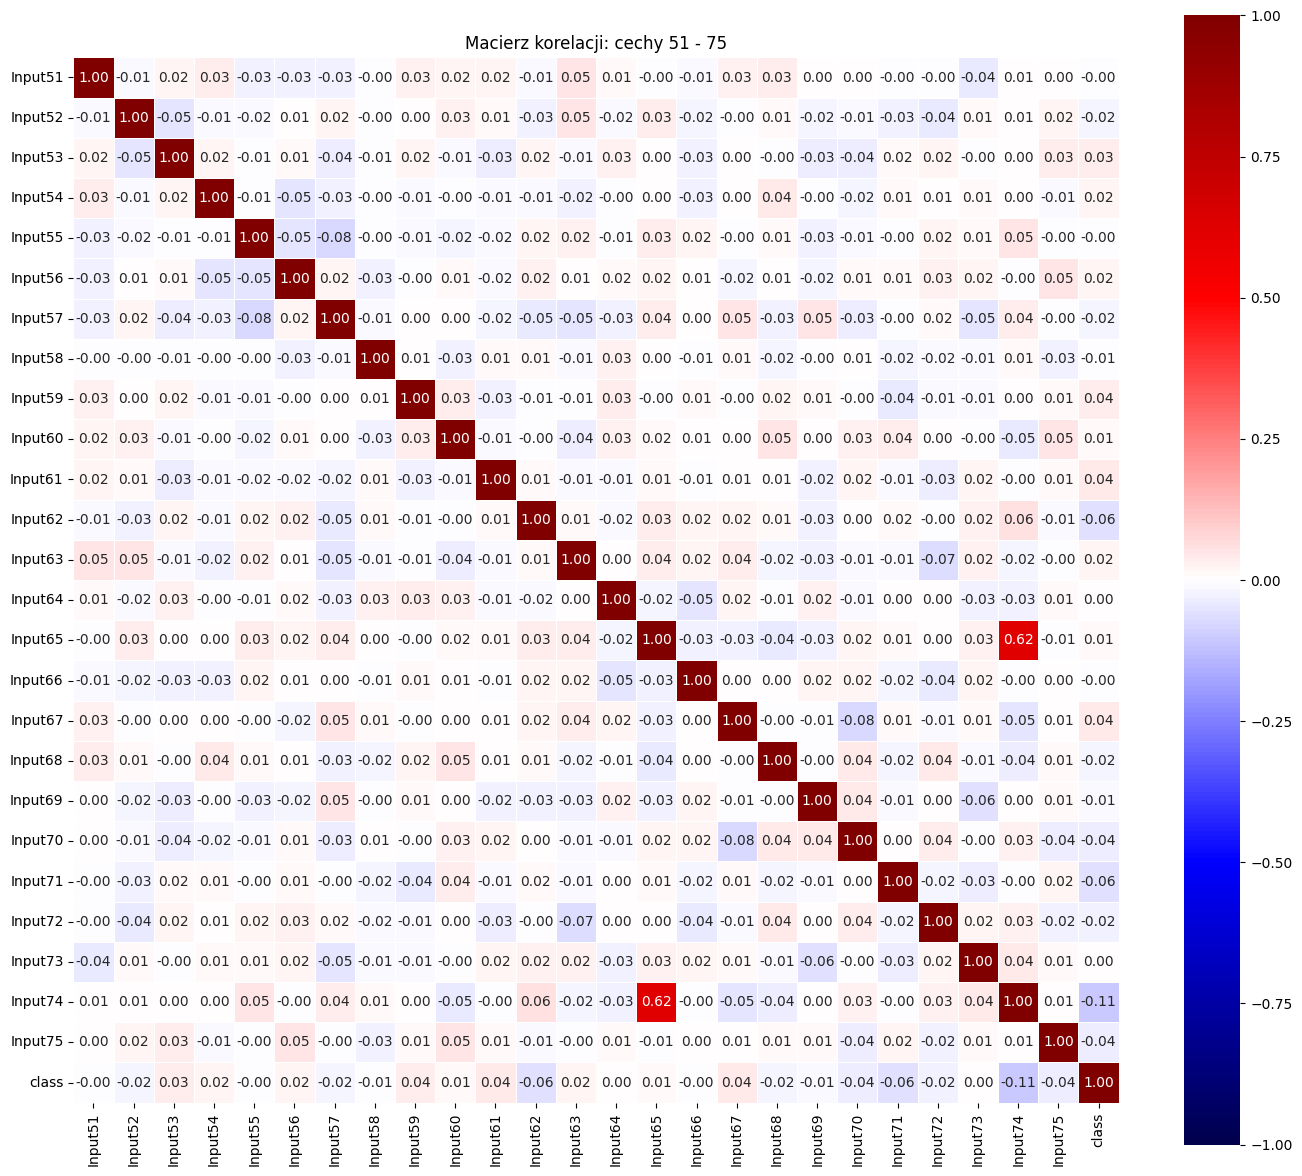

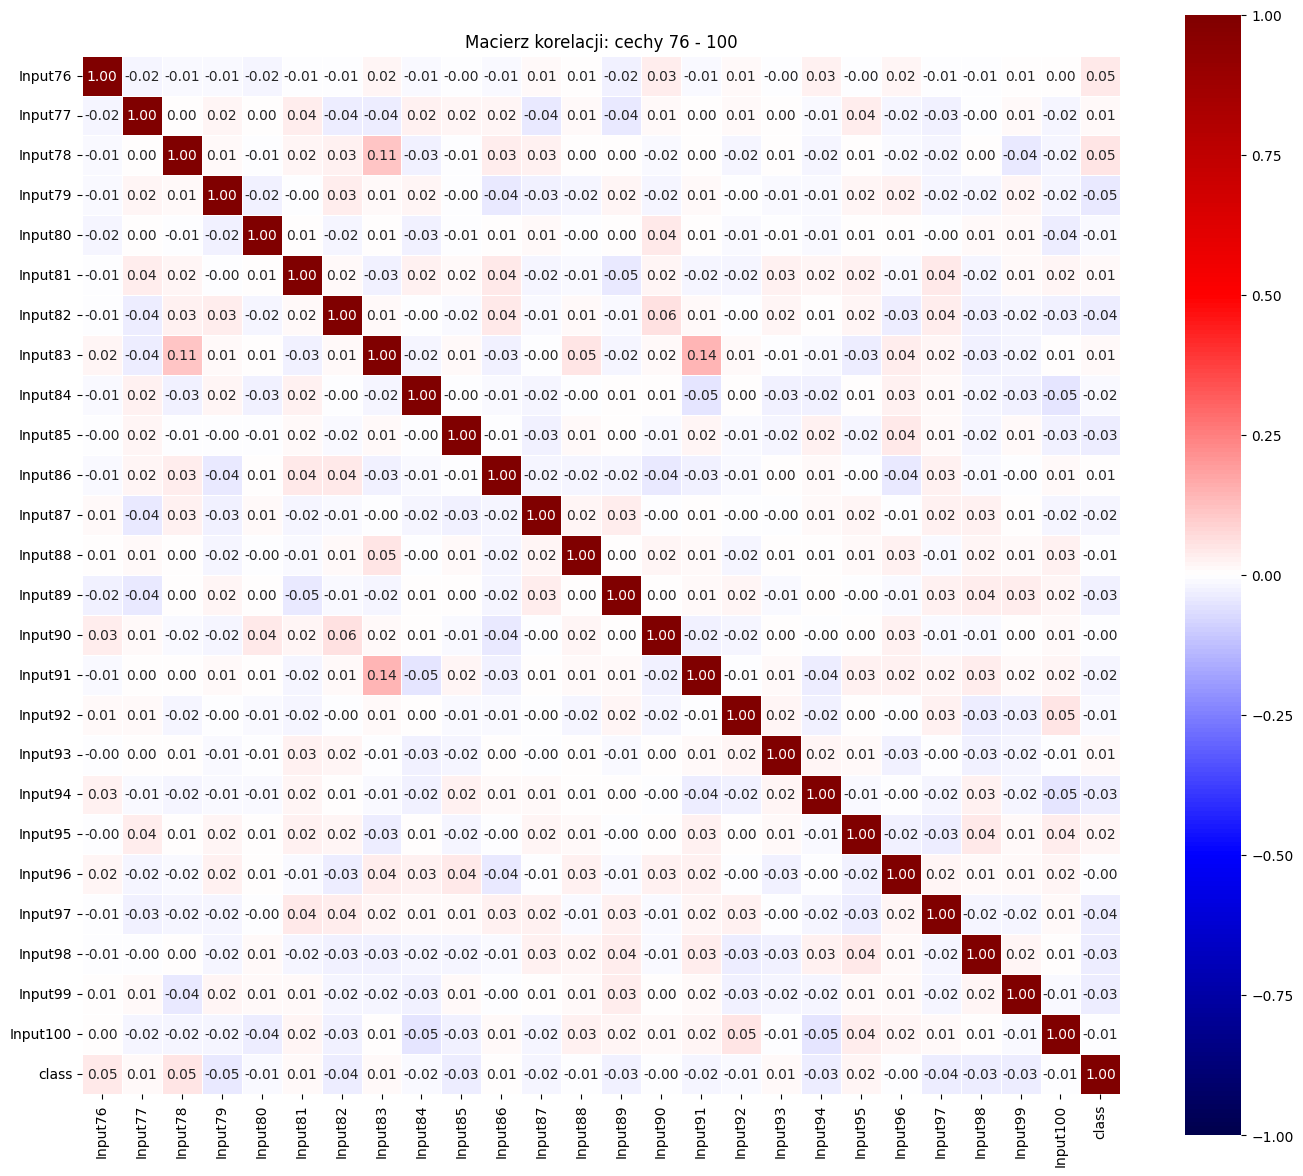

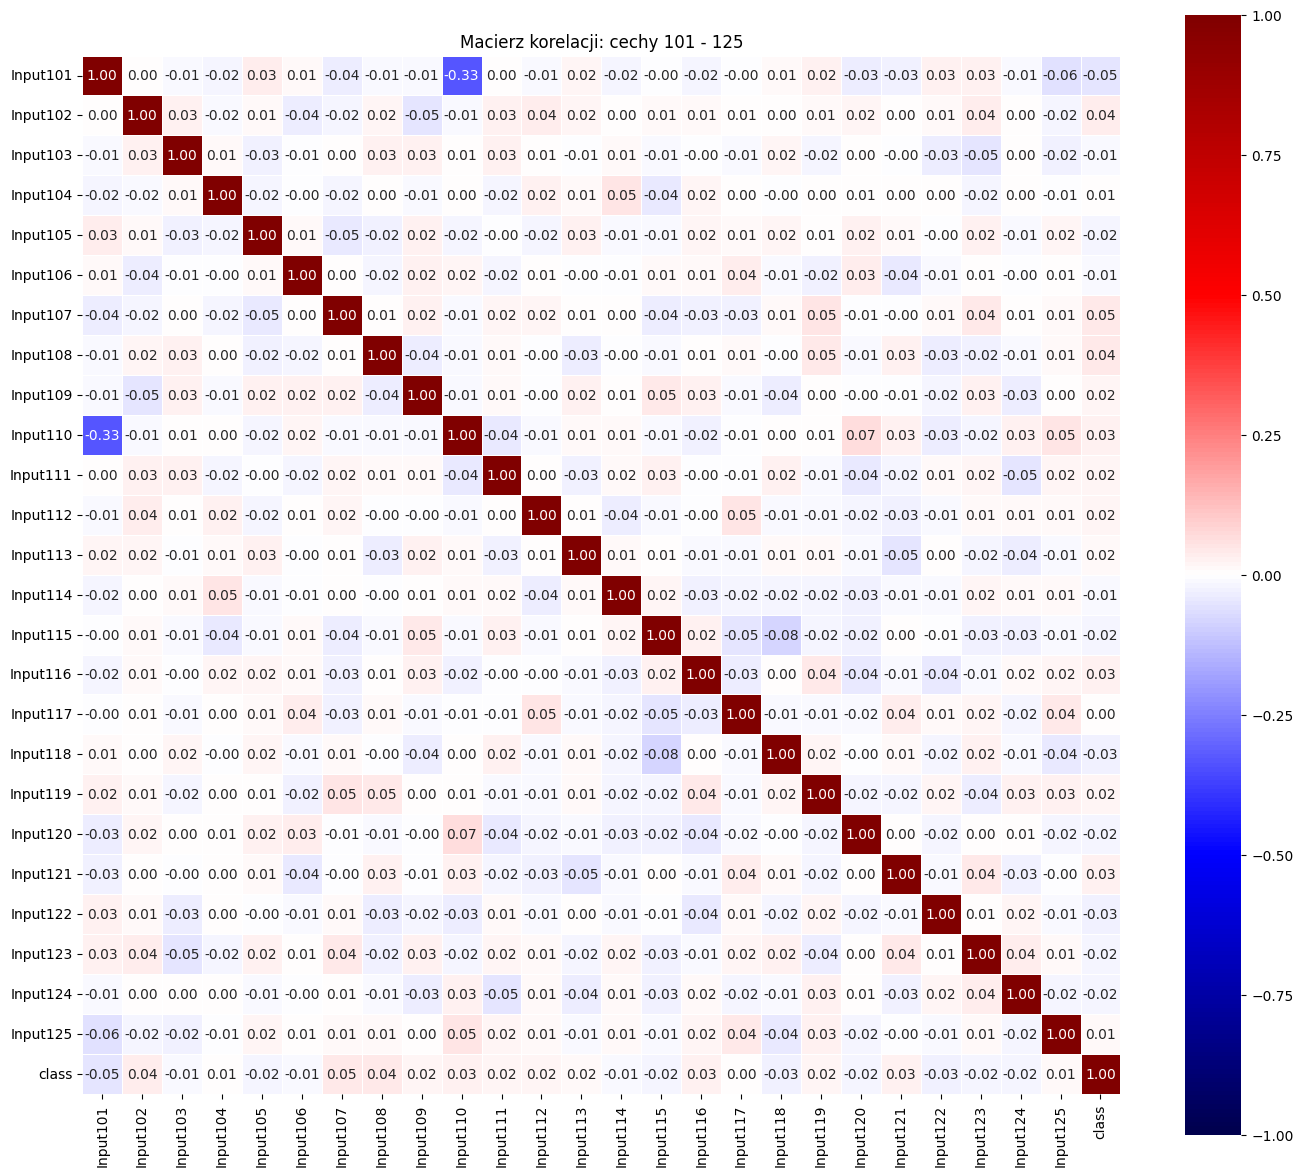

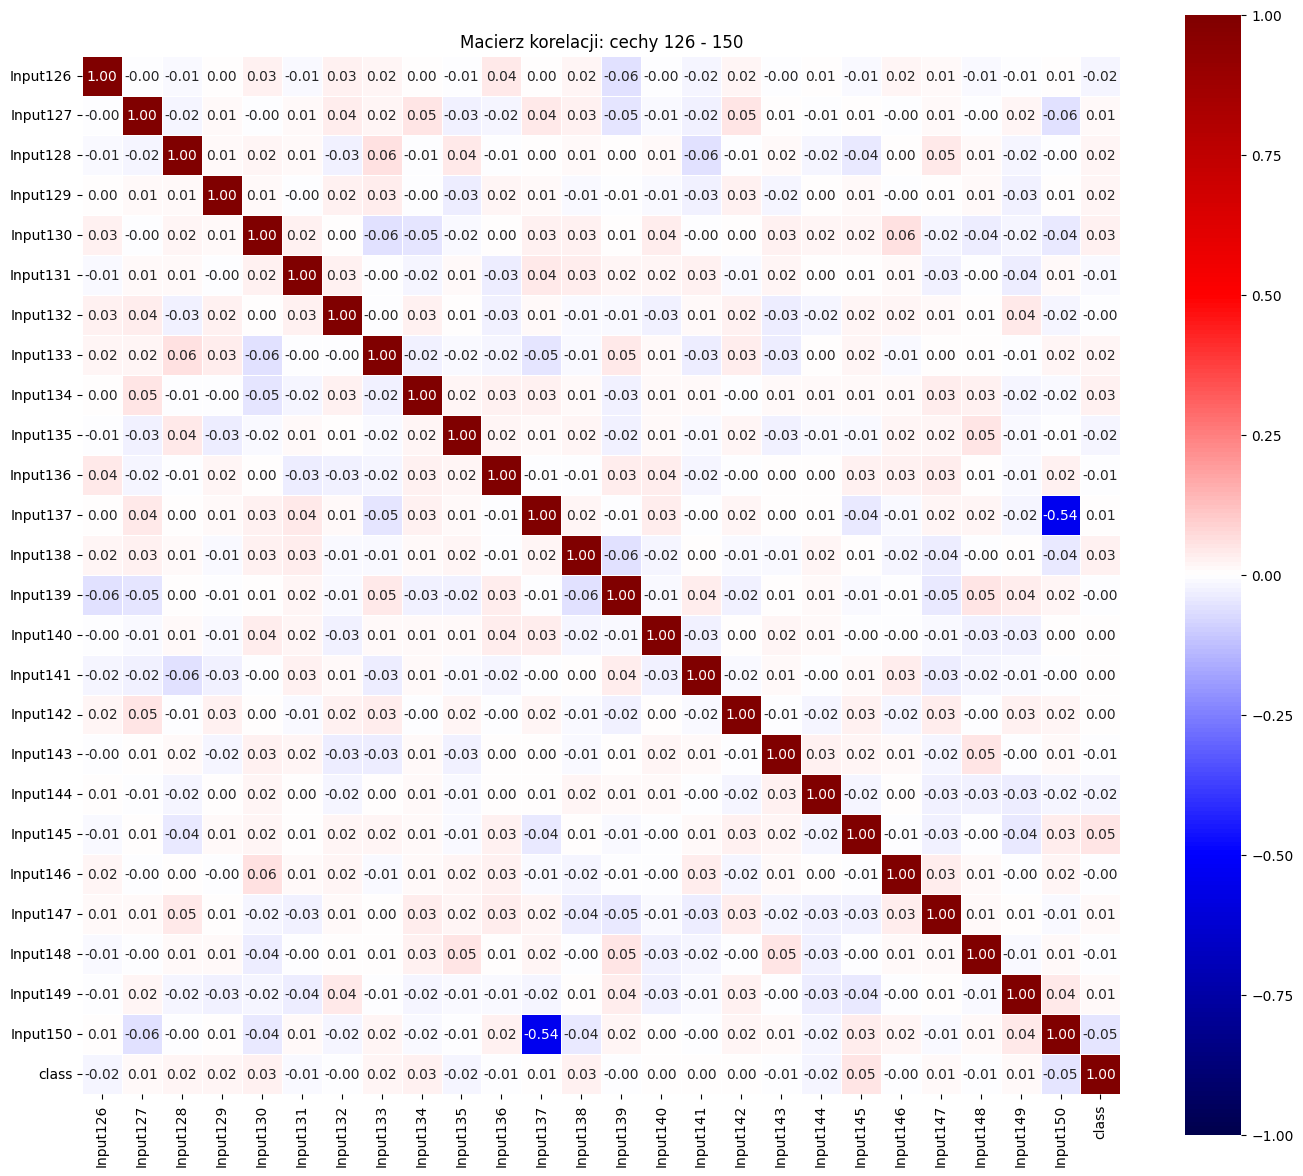

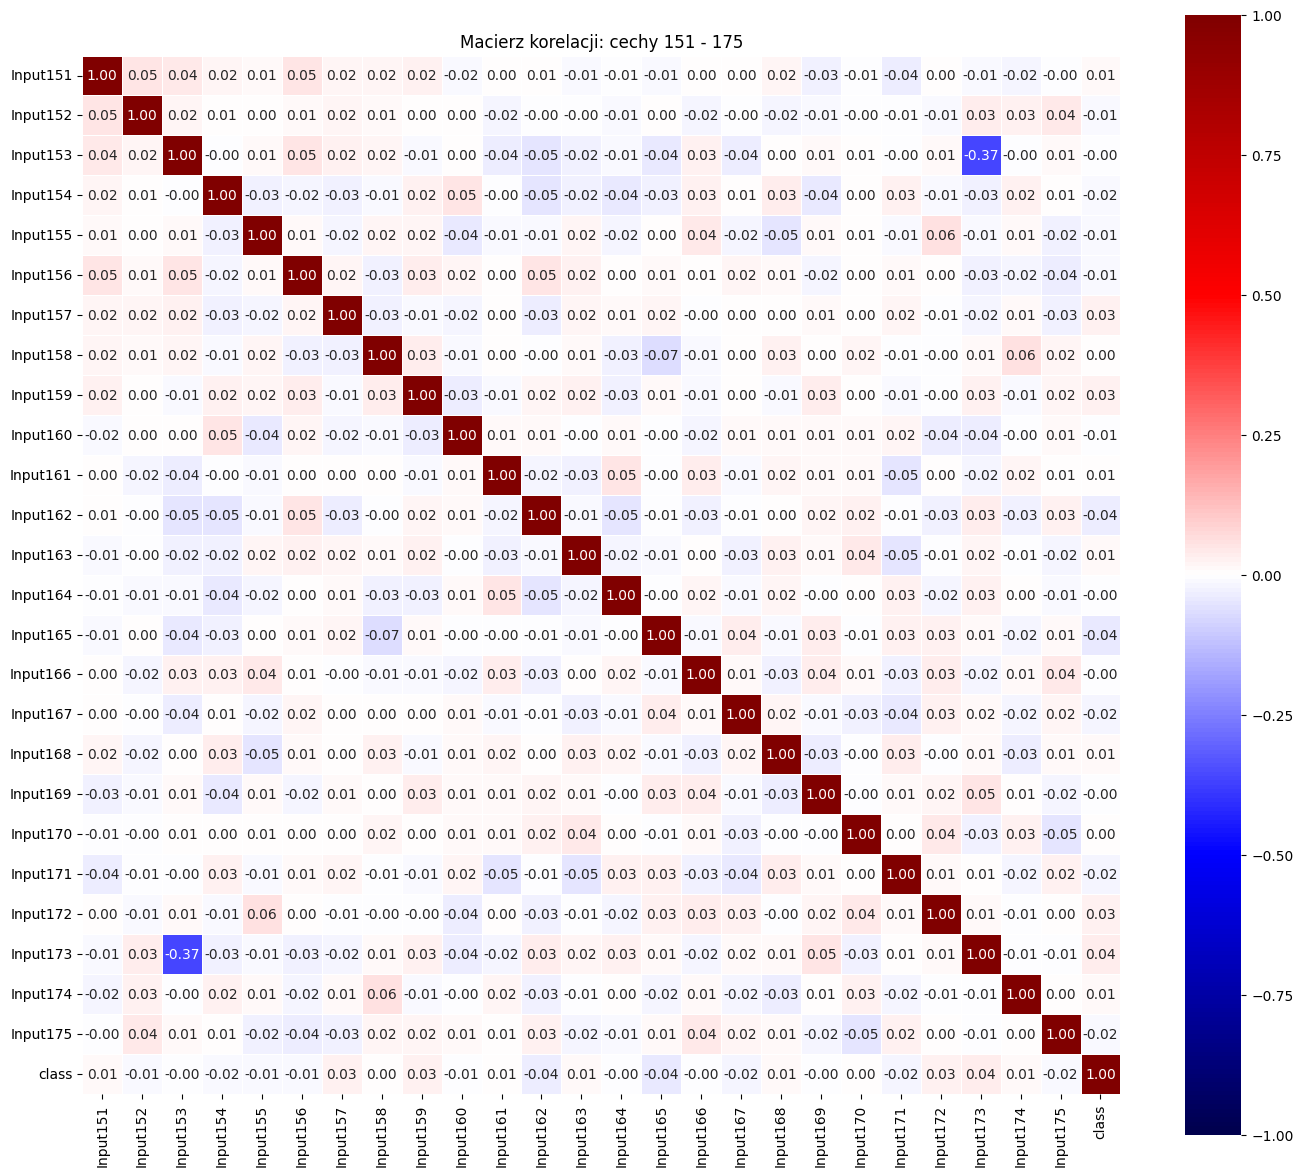

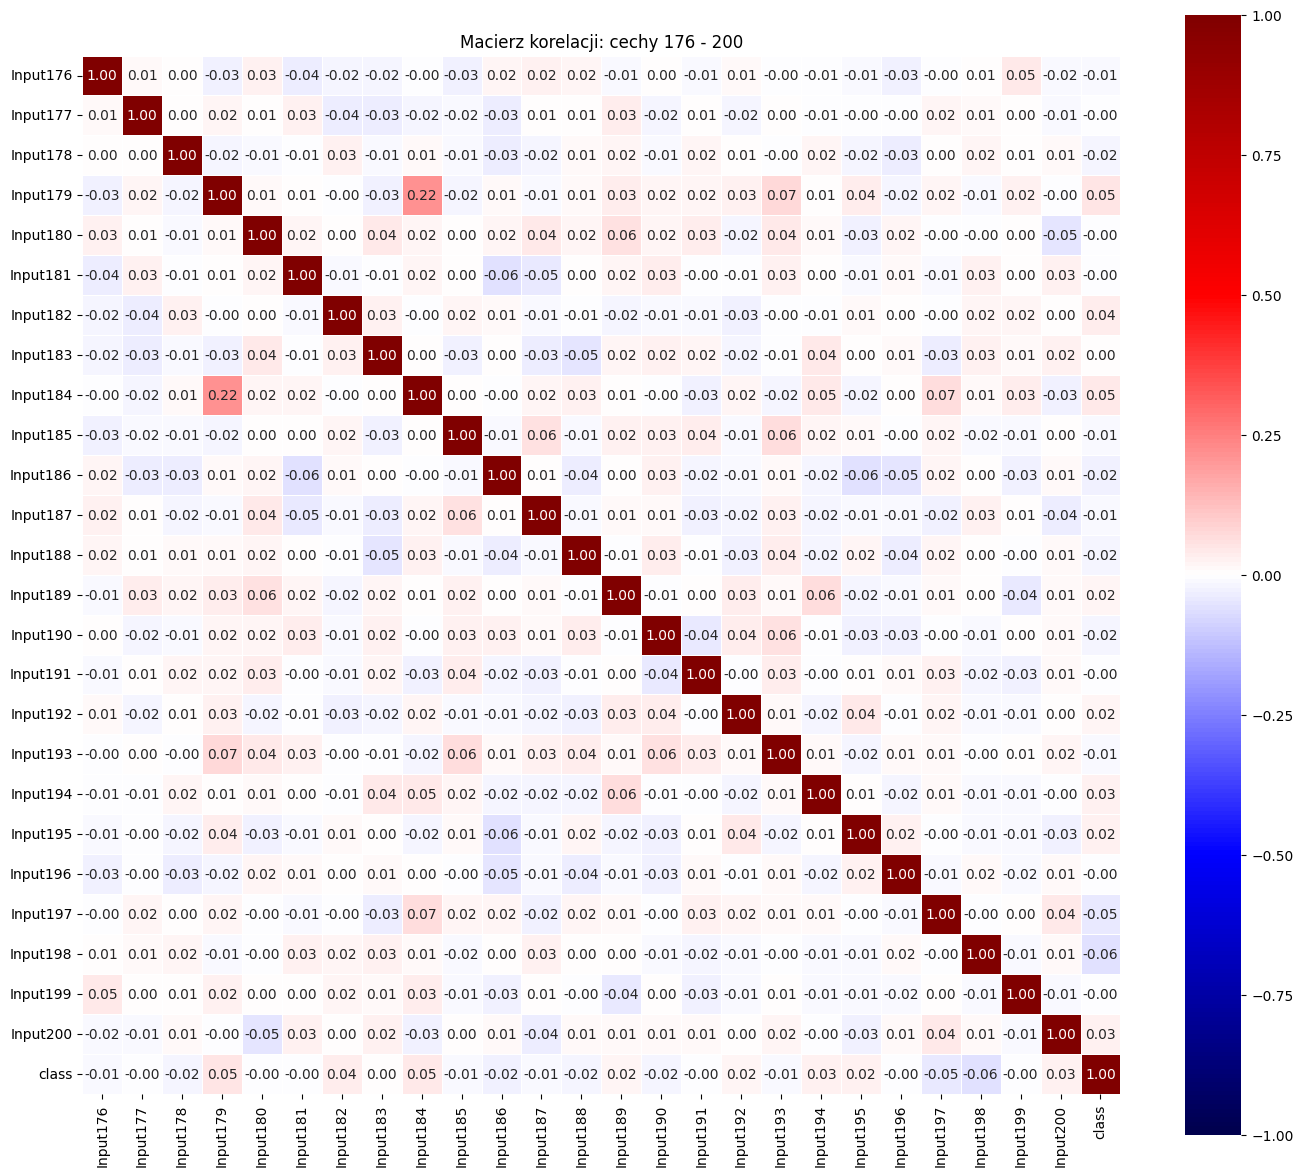

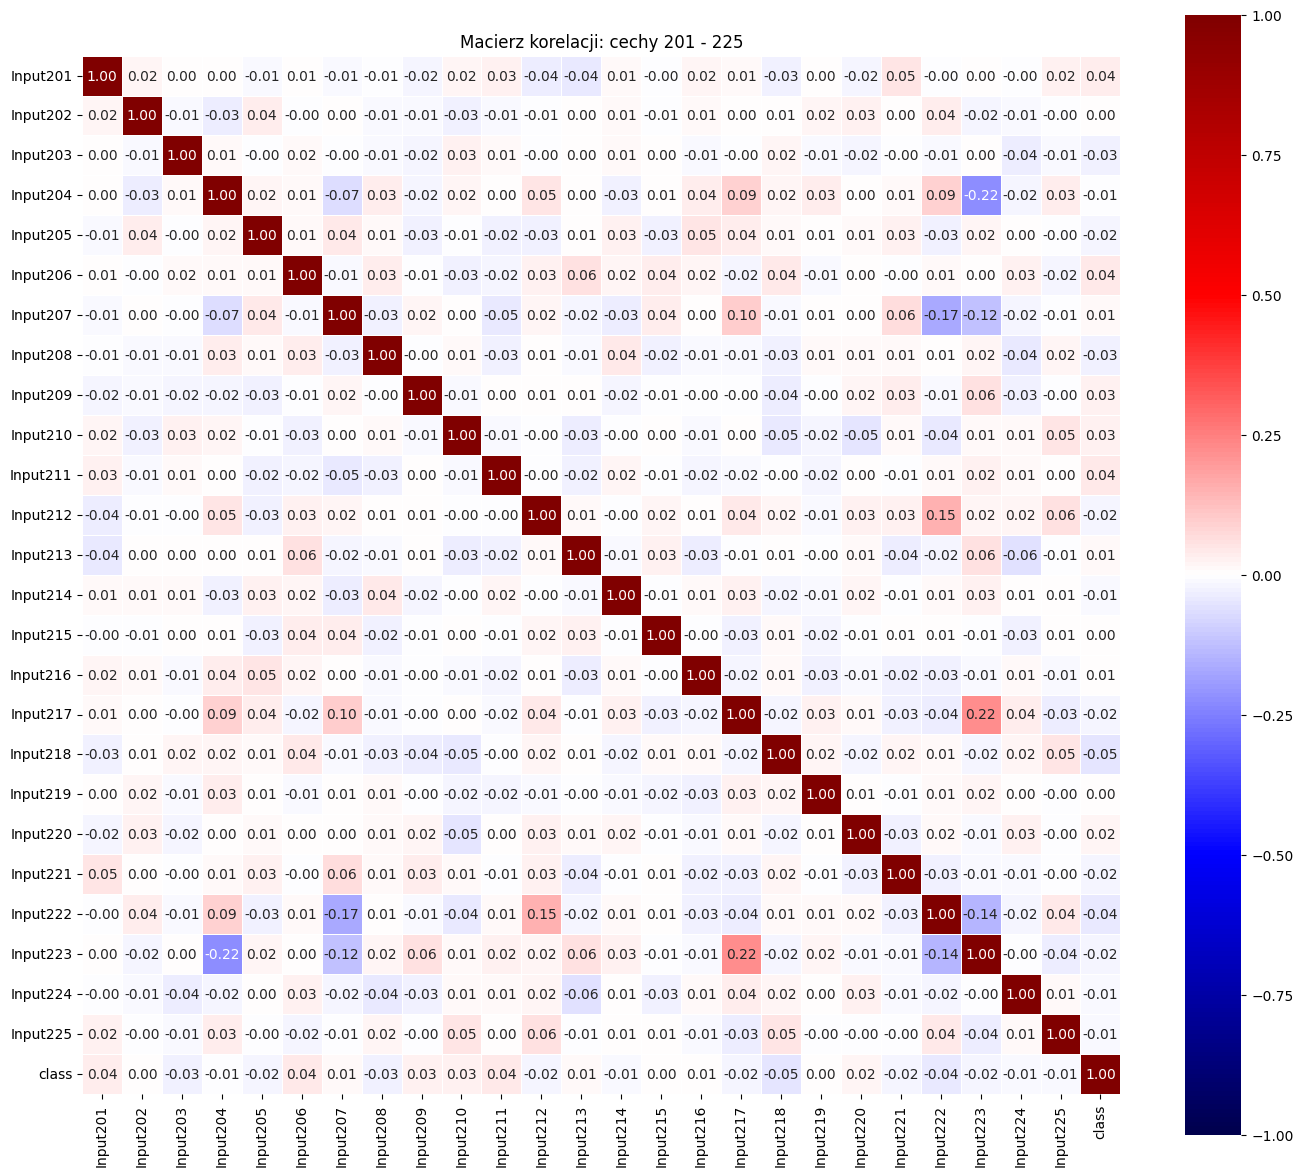

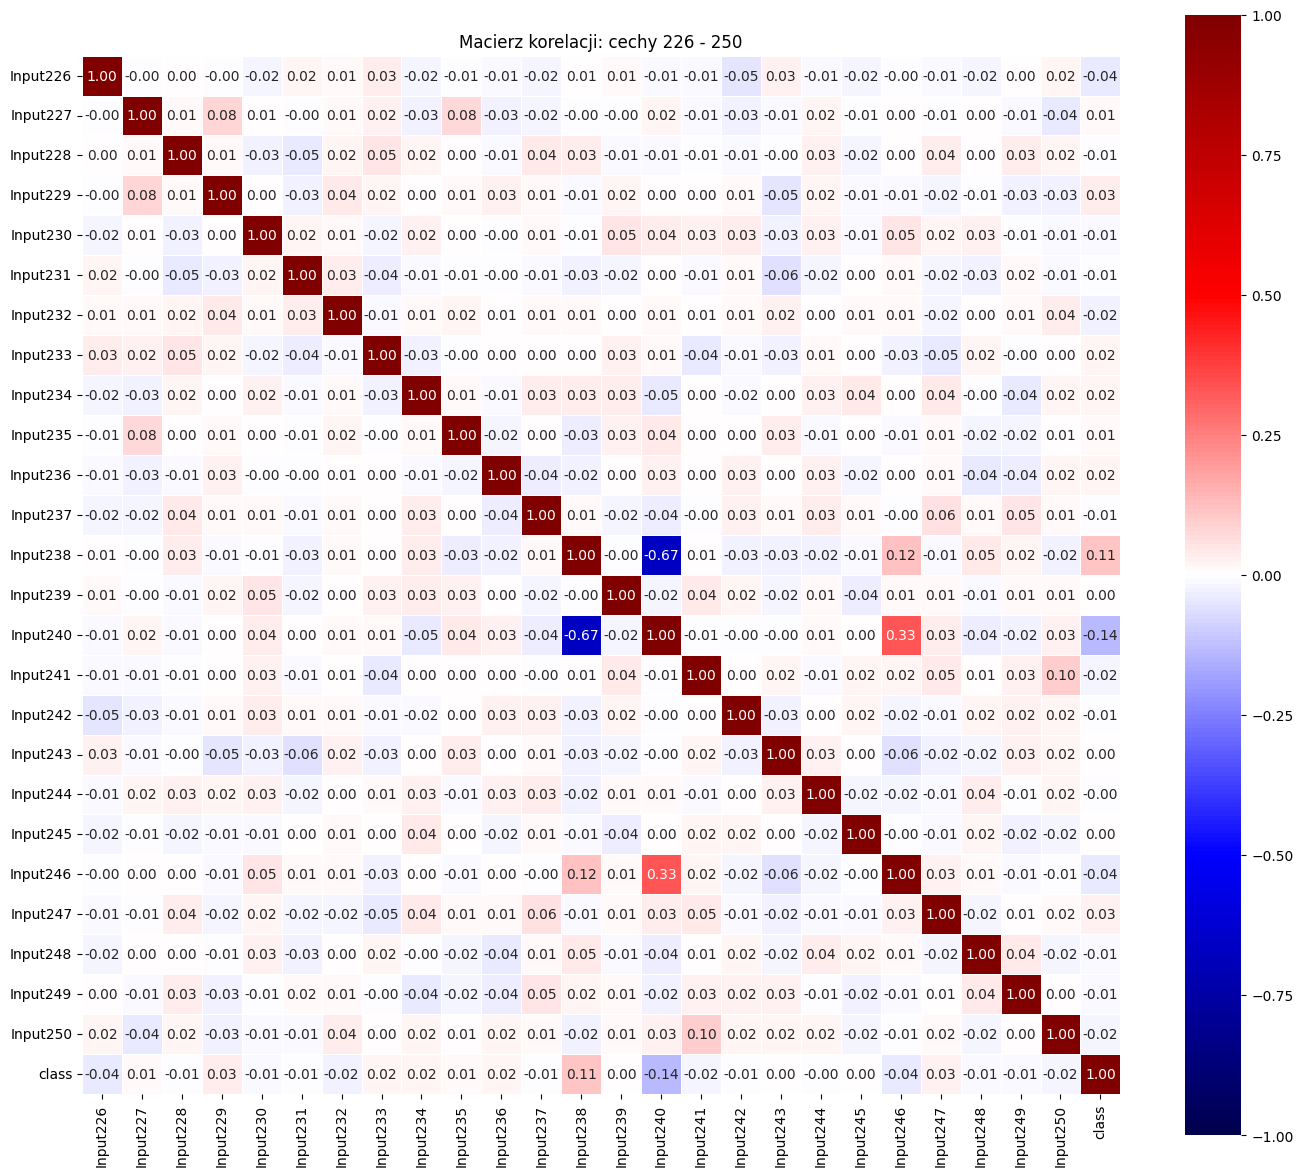

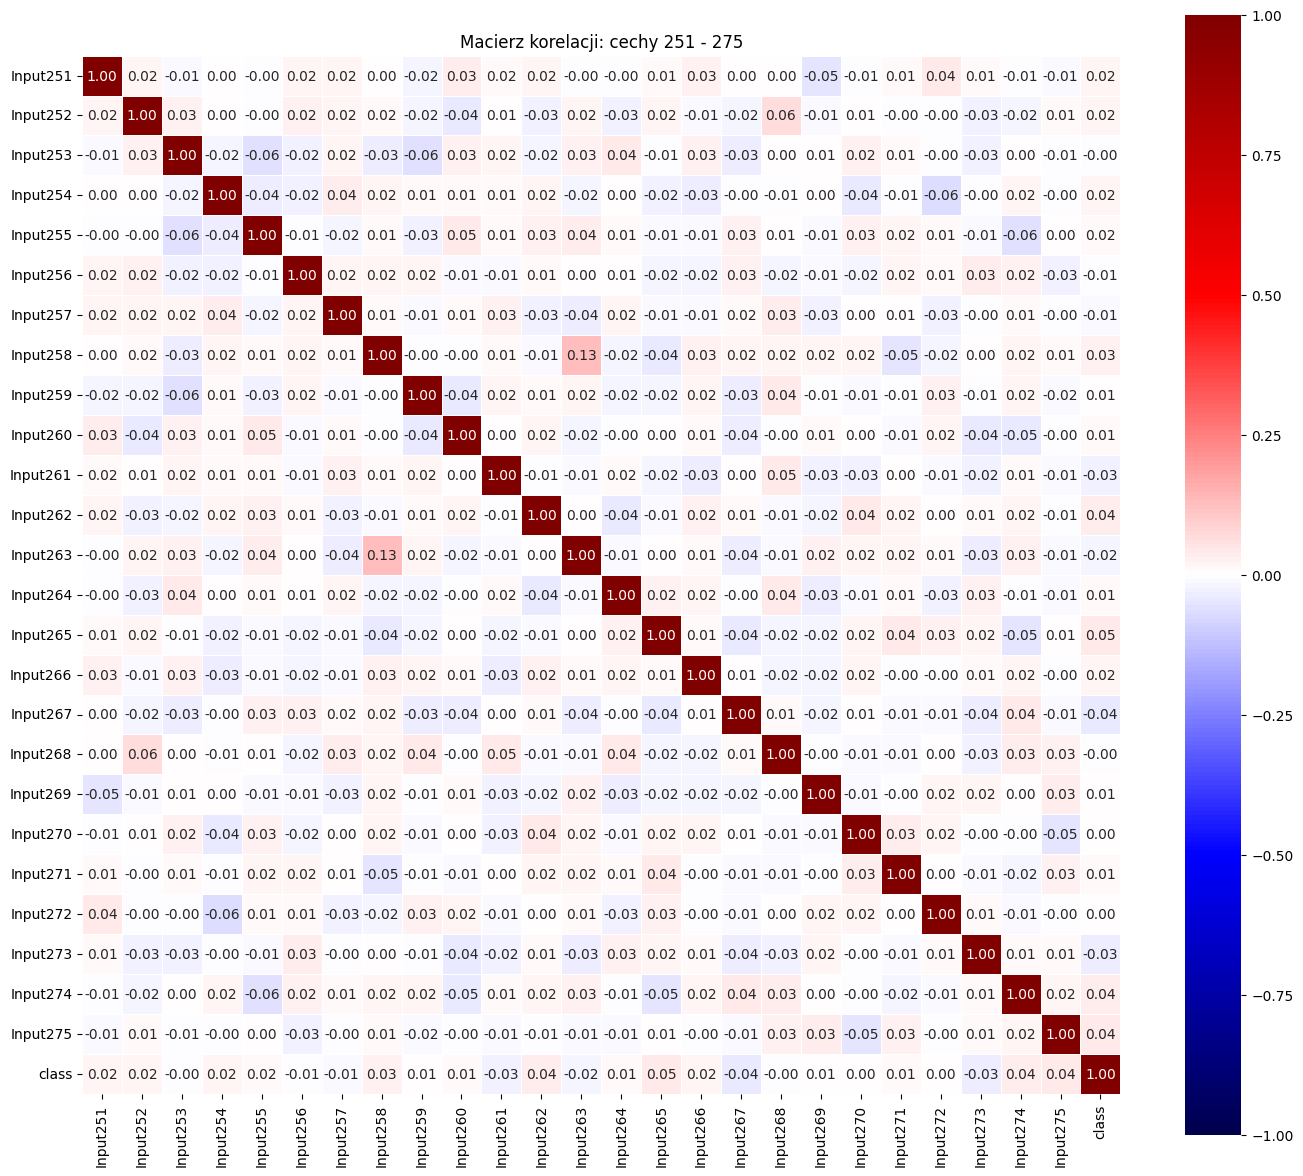

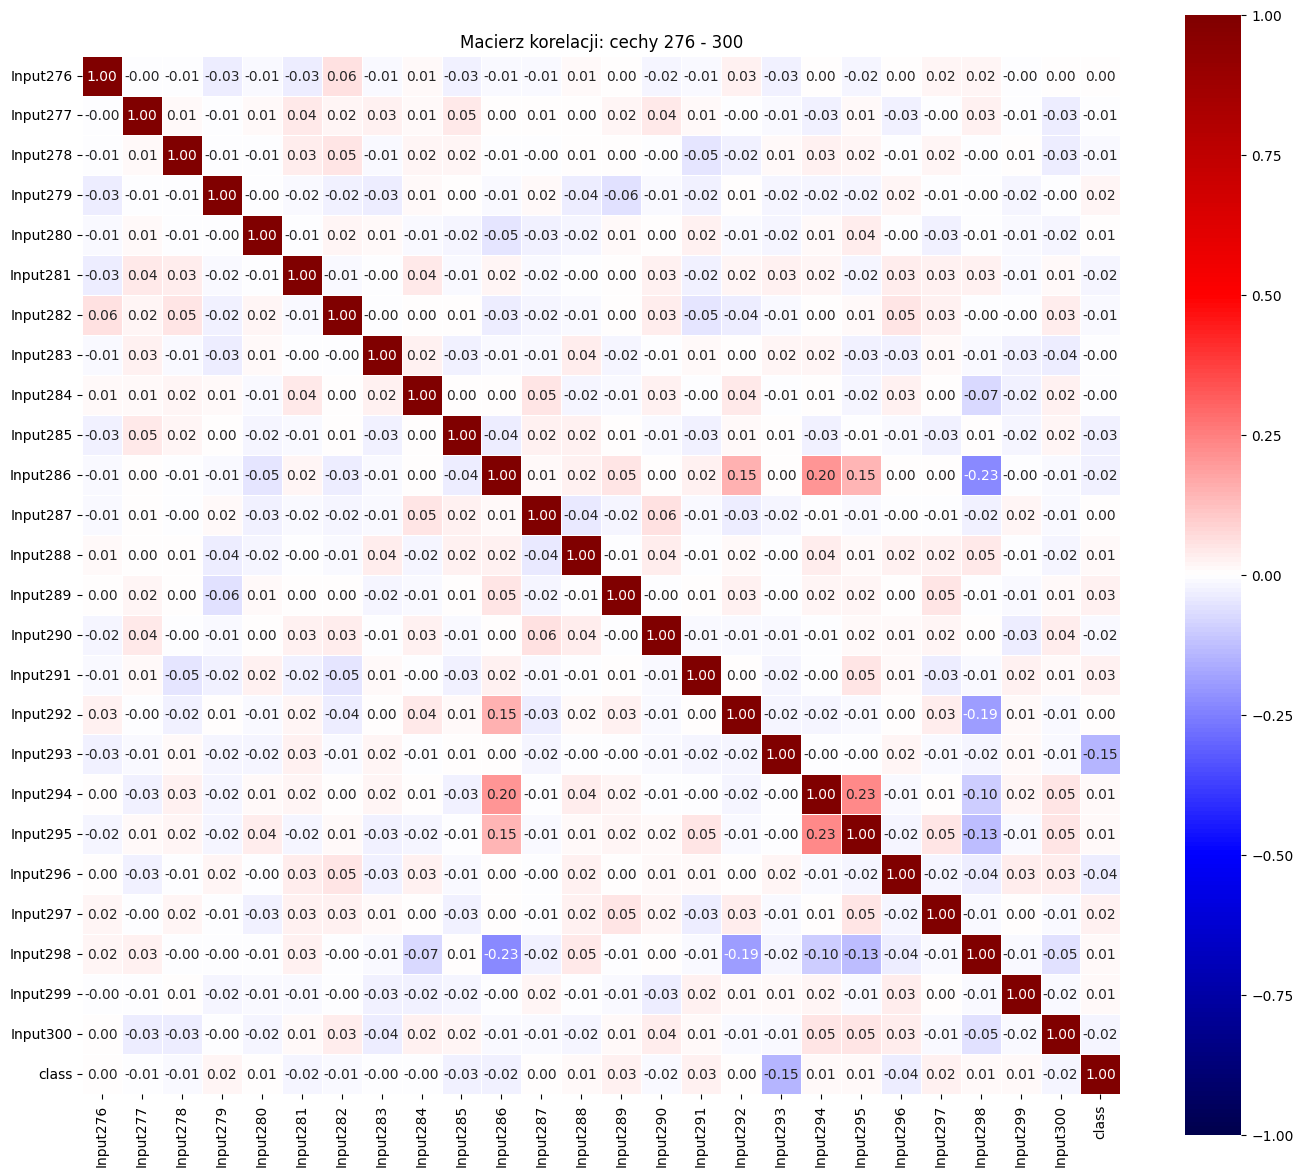

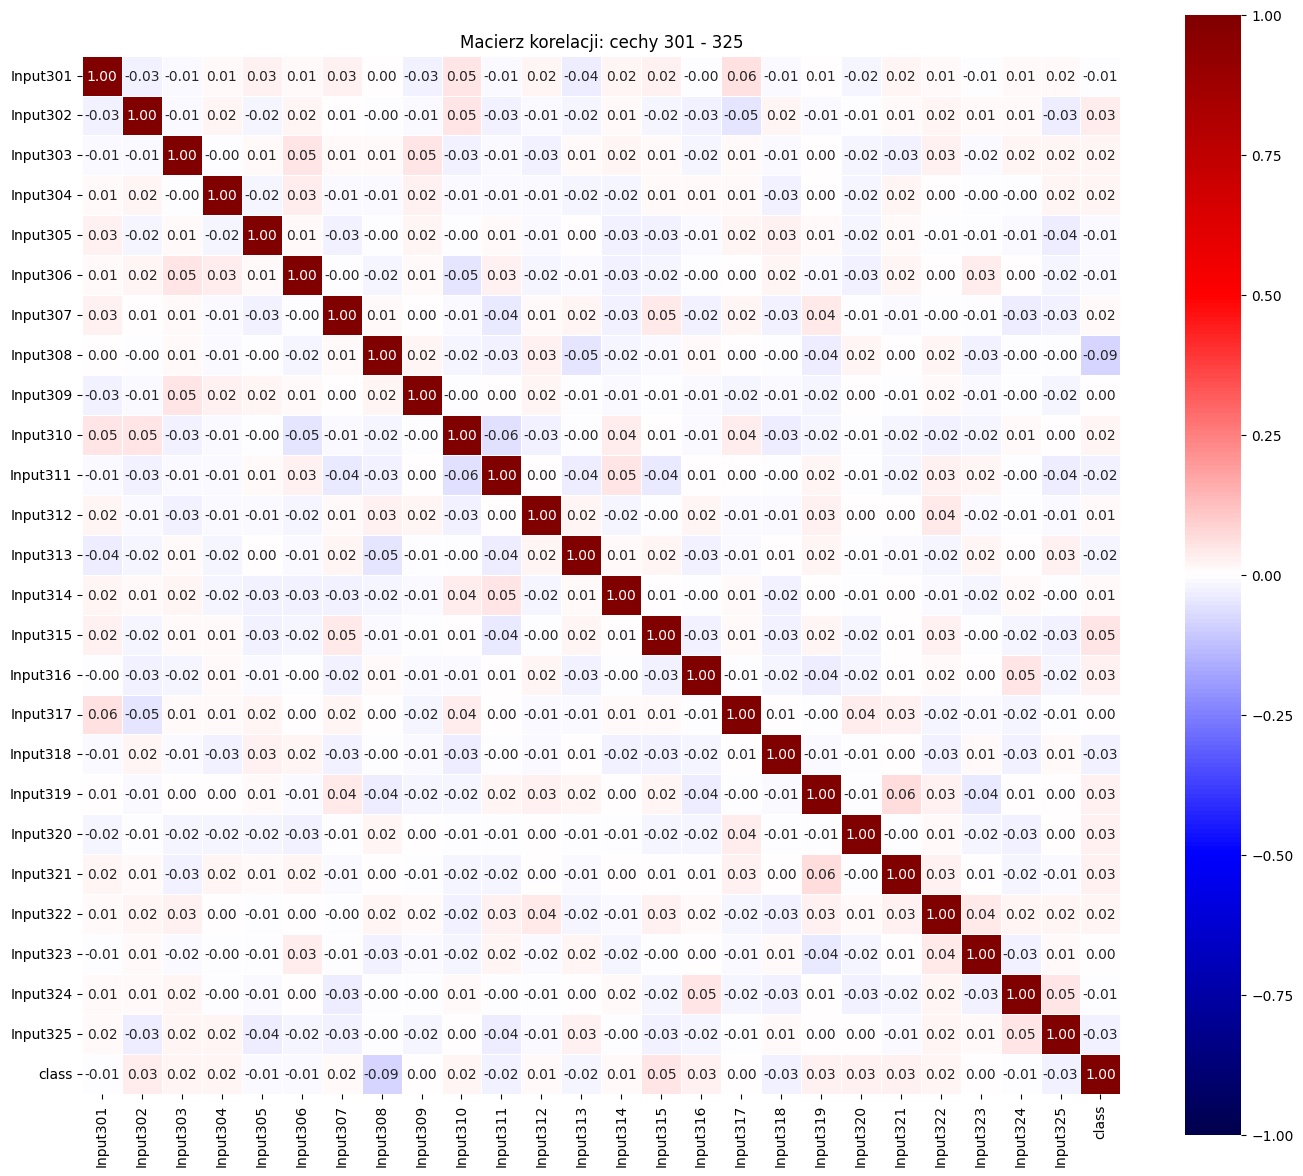

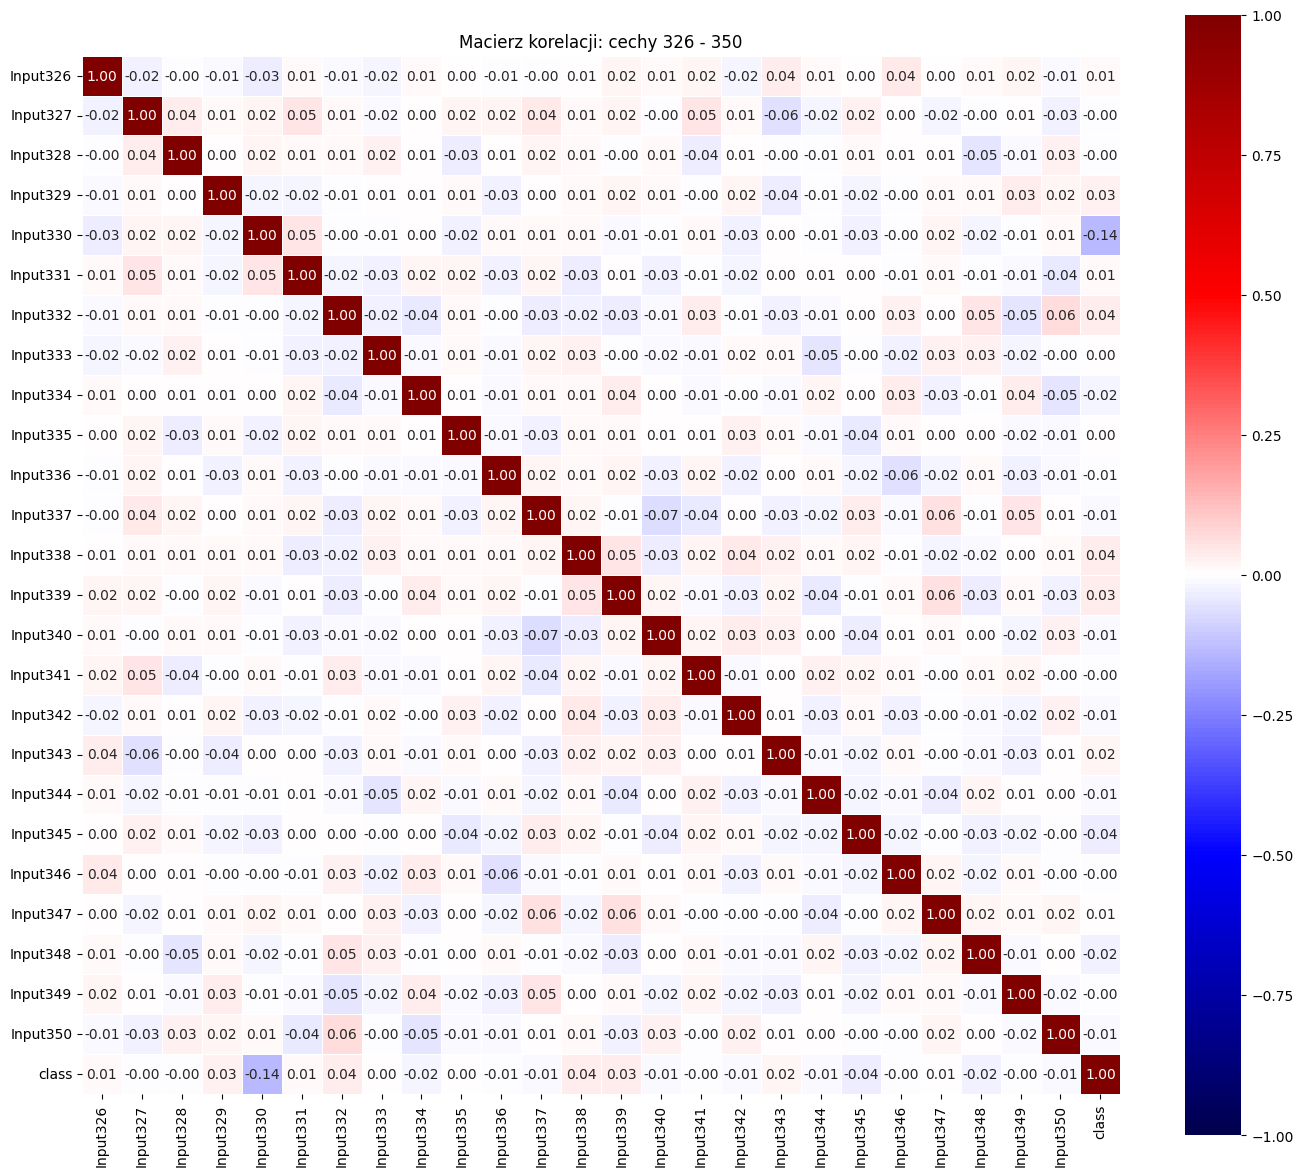

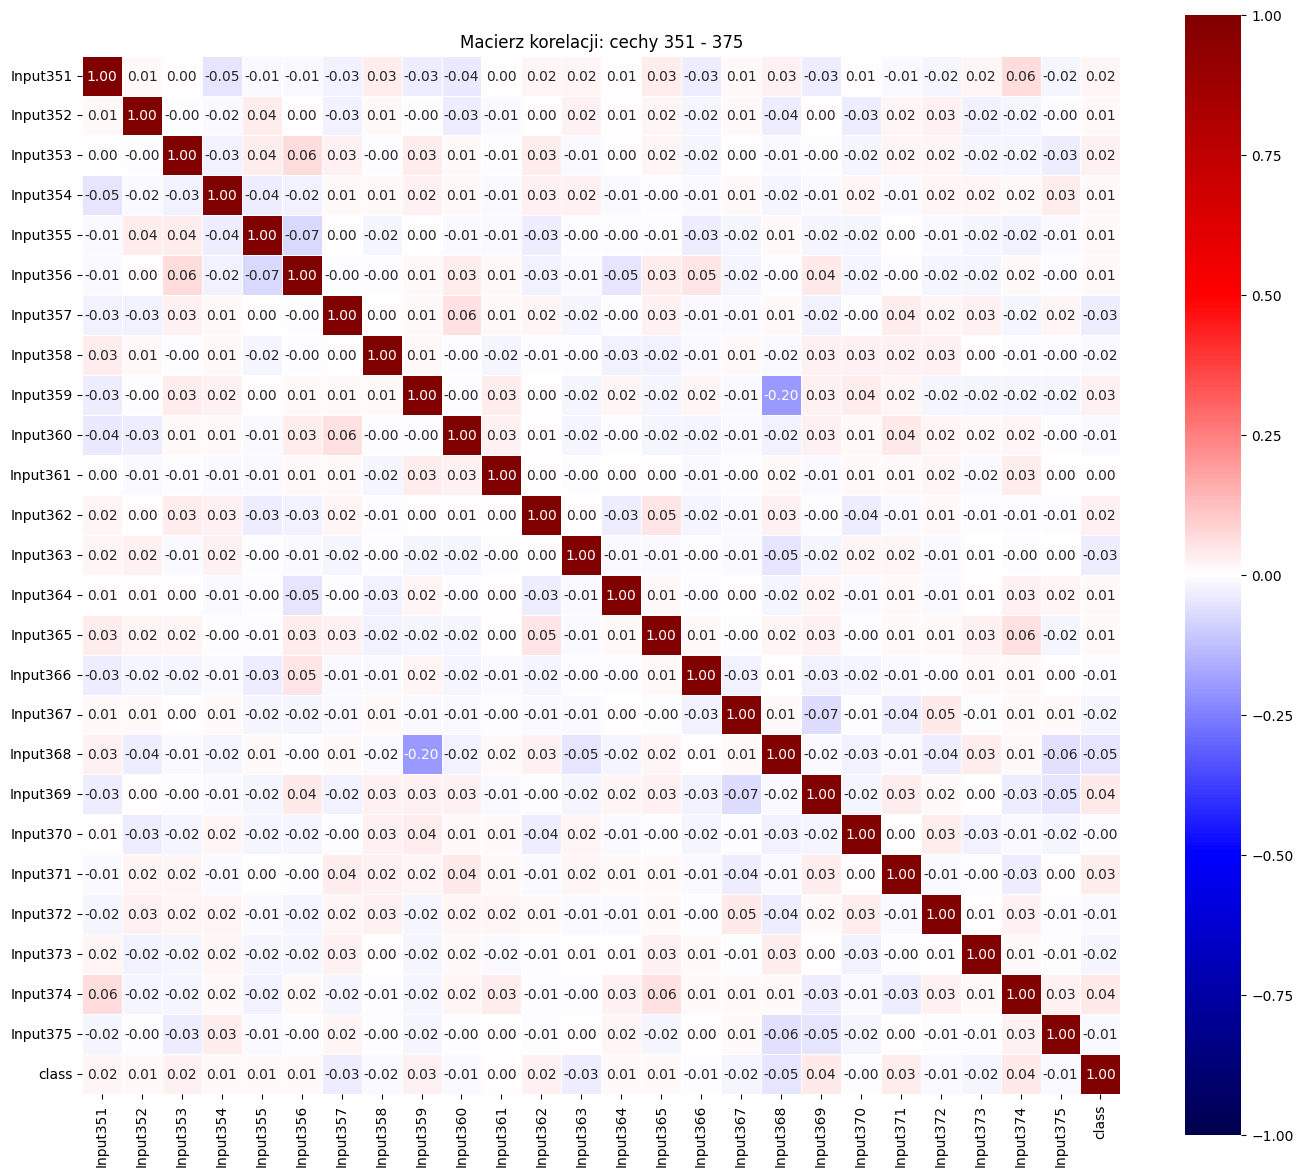

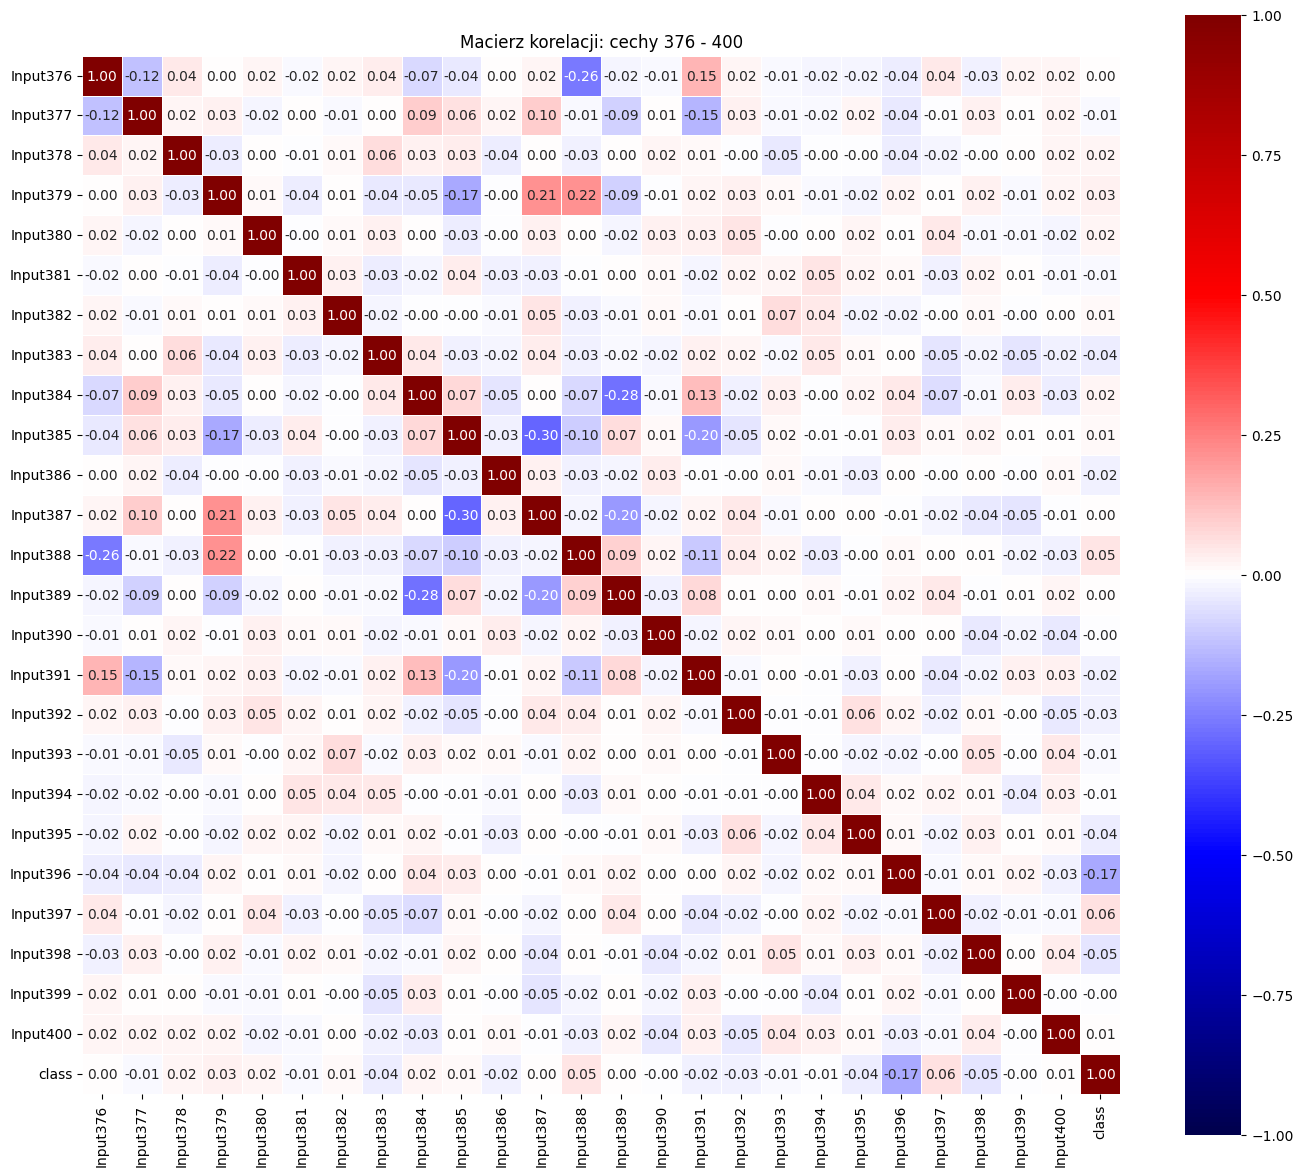

In [256]:
tab_corr = pd.DataFrame(X)
tab_corr['class'] = y_class

num_features = X.shape[1]
features_per_plot = 25

strong_features = []
very_strong_features = []

for i in range(0, num_features, features_per_plot):
    selected_columns = list(tab_corr.columns[i:i+features_per_plot]) + ['class']
    corr_matrix = tab_corr[selected_columns].corr()

    # Rysowanie macierzy korelacji
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='seismic',
        center=0,
        vmin=-1, vmax=1,
        linewidths=0.5,
        square=True
    )
    plt.title(f'Macierz korelacji: cechy {i+1} - {i + features_per_plot}')
    plt.tight_layout()
    plt.show()

    correlations = corr_matrix['class'].drop('class')
    strong_corr = correlations[correlations.abs() >= 0.05]
    very_strong_corr = correlations[correlations.abs() >= 0.1]

    # Dodajemy cechy
    strong_features.extend(strong_corr.index.tolist())
    very_strong_features.extend(very_strong_corr.index.tolist())


In [257]:
print("Strong features:\n", strong_features)
print("\n\nVery strong features:\n", very_strong_features)

Strong features:
 ['Input2', 'Input13', 'Input40', 'Input41', 'Input62', 'Input71', 'Input74', 'Input101', 'Input150', 'Input198', 'Input218', 'Input238', 'Input240', 'Input293', 'Input308', 'Input315', 'Input330', 'Input388', 'Input396', 'Input397', 'Input398']


Very strong features:
 ['Input2', 'Input40', 'Input74', 'Input238', 'Input240', 'Input293', 'Input330', 'Input396']


#### 2.2.1 Wybór cech najbardziej istotnych z punktu widzenia modelu XGBClassifier

In [263]:
clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# Wybór cech powyżej średniej ważności
feature_importance = clf.feature_importances_
selected = X.columns[feature_importance > np.mean(feature_importance) + 2 * np.std(feature_importance)]
print(selected)

X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:36:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Index(['Input3', 'Input41', 'Input65', 'Input85', 'Input95', 'Input152',
       'Input236', 'Input240', 'Input256', 'Input325', 'Input330', 'Input337',
       'Input340', 'Input361', 'Input396'],
      dtype='object')


#### 2.2.2 Wybór cech najbardziej skorelowanych z klasą

In [264]:
df_corr = X.copy()
df_corr['Class'] = y_class
correlations = df_corr.corr()['Class'].drop('Class')
selected_corr = correlations[correlations.abs() > 0.09].index.tolist()
print(selected_corr)

X_train_sel2 = X_train[selected_corr]
X_test_sel2 = X_test[selected_corr]

['Input2', 'Input40', 'Input41', 'Input74', 'Input238', 'Input240', 'Input293', 'Input330', 'Input396']


#### 2.2.3 Wybór cech najbardziej istotnych z punktu widzenia modelu XGBClassifier lub najbardziej skorelowanych z klasą

In [262]:
# Wybieram cechy ważne z punktu widzenia XGBClassifier
clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# Wybieram cechy istotne powyżej średniej + 2 * std
feature_importance = clf.feature_importances_
selected_xgb = X.columns[feature_importance > np.mean(feature_importance) + 2 * np.std(feature_importance)]

# Wybieram cechy najbardziej skorelowane z klasą
df_corr = X.copy()
df_corr['Class'] = y_class
correlations = df_corr.corr()['Class'].drop('Class')
selected_corr = correlations[correlations.abs() > 0.07].index

# Łączę cechy z obu metod
selected_combined = list(set(selected_xgb).union(set(selected_corr)))
print(selected_combined)

# Tworzę nowy zbiorów danych
X_train_sel3 = X_train[selected_combined]
X_test_sel3 = X_test[selected_combined]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['Input308', 'Input340', 'Input41', 'Input325', 'Input293', 'Input85', 'Input65', 'Input238', 'Input3', 'Input337', 'Input361', 'Input74', 'Input2', 'Input330', 'Input240', 'Input40', 'Input152', 'Input95', 'Input396', 'Input236', 'Input256']


### 2.3 Trening modeli

#### 2.3.1 Trening modeli z danymi o cechach najbardziej istotnych z punktu widzenia modelu XGBClassifier

In [171]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



XGBoost Accuracy: 0.7550
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       197
           1       0.76      0.76      0.76       203

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.76      0.75       400


RandomForest Accuracy: 0.7175
              precision    recall  f1-score   support

           0       0.73      0.69      0.70       197
           1       0.71      0.75      0.73       203

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400


LogisticRegression Accuracy: 0.5425
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       197
           1       0.55      0.56      0.55       203

    accuracy                           0.54       400
   macro avg       0.54      0.54 

#### 2.3.2 Trening modeli z danymi o cechach najbardziej skorelowanych z klasą

In [266]:
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train_sel2, y_train)
    y_pred = model.predict(X_test_sel2)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



XGBoost Accuracy: 0.7650
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       197
           1       0.78      0.75      0.76       203

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.76       400
weighted avg       0.77      0.77      0.76       400


RandomForest Accuracy: 0.7675
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       197
           1       0.77      0.78      0.77       203

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400


LogisticRegression Accuracy: 0.5300
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       197
           1       0.54      0.54      0.54       203

    accuracy                           0.53       400
   macro avg       0.53      0.53 

#### 2.3.3 Trening modeli z danymi spełniającymi z jednym z dwóch zestawów

In [265]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train_sel3, y_train)
    y_pred = model.predict(X_test_sel3)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



XGBoost Accuracy: 0.7800
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       197
           1       0.78      0.78      0.78       203

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400


RandomForest Accuracy: 0.7800
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       197
           1       0.77      0.81      0.79       203

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400


LogisticRegression Accuracy: 0.5425
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       197
           1       0.55      0.56      0.55       203

    accuracy                           0.54       400
   macro avg       0.54      0.54 

###  Komentarz

**Najlepszy model**

- KNN (0.8000) osiągnął najwyższą skuteczność przy drugim zestawie cech (X_train_sel2), wybranych na podstawie korelacji z klasą.

- RandomForest i XGBoost były konsekwentnie skuteczne (≥ 0.77) — potwierdza to ich odporność na wybór cech.

**Najlepszy zbiór cech**

- Zestaw drugi danych (X_train_sel2) z cechami wybranymi , bazując na korelacji z klasą (|r| > 0.09), dawał lepsze wyniki w większości modeli.

**Najsłabsze modele**

- LogisticRegression i NaiveBayes mają znacznie niższą skuteczność — wskazuje to na nieliniowy charakter danych, więc nie dziwi niski uzyskany przez te modele rezultat.


## 3. Zaawansowana Regresja

In [270]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score

### 3.1 Przygotowanie danych

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y_output, test_size=0.2, random_state=42)

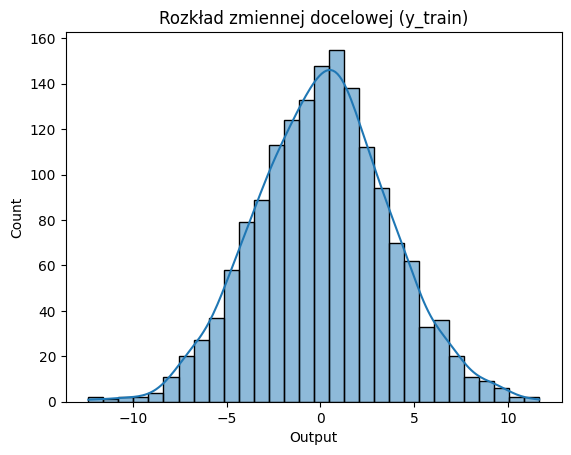

In [300]:
sns.histplot(y_train, kde=True)
plt.title("Rozkład zmiennej docelowej (y_train)")
plt.show()

### 3.2 Wybór cech

In [320]:
# --- 1. Feature importance z XGBRegressor ---
model = XGBRegressor(n_estimators=100, eval_metric='rmse')
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
selected_xgb = X.columns[feature_importance > np.mean(feature_importance) + 2 * np.std(feature_importance)]
print(f"\nWybrane cechy według xgb: {selected_xgb}")

# --- 2. Korelacja z wartością docelową ---
df_corr = X.copy()
df_corr['Output'] = y_output
correlations = df_corr.corr()['Output'].drop('Output')
selected_corr = correlations[correlations.abs() > 0.07].index
print(f"\nWybrane cechy według korelacji: {selected_corr}")

# --- 3. Połączenie cech z obu metod ---
selected_combined = list(set(selected_xgb).union(set(selected_corr)))
print(f"\nWybrane cechy po połączeniu metody wyboru: {selected_combined}")


Wybrane cechy według xgb: Index(['Input83', 'Input136', 'Input167', 'Input173', 'Input193', 'Input197',
       'Input223', 'Input292', 'Input301', 'Input388'],
      dtype='object')

Wybrane cechy według korelacji: Index(['Input13', 'Input18', 'Input57', 'Input83', 'Input136', 'Input143',
       'Input153', 'Input167', 'Input173', 'Input179', 'Input184', 'Input193',
       'Input204', 'Input222', 'Input223', 'Input241', 'Input250', 'Input258',
       'Input286', 'Input292', 'Input294', 'Input295', 'Input298', 'Input301',
       'Input302', 'Input342', 'Input359', 'Input376', 'Input377', 'Input385',
       'Input388', 'Input389'],
      dtype='object')

Wybrane cechy po połączeniu metody wyboru: ['Input204', 'Input376', 'Input389', 'Input193', 'Input83', 'Input377', 'Input295', 'Input13', 'Input223', 'Input57', 'Input153', 'Input197', 'Input167', 'Input18', 'Input184', 'Input302', 'Input294', 'Input136', 'Input143', 'Input222', 'Input250', 'Input388', 'Input286', 'Input342', 'Input359'

### 3.3 Trening modeli

#### 3.3.1 Trening modeli z danymi o cechach najbardziej istotnych z punktu widzenia modelu XGBRegressor

In [321]:
# --- 4.1 Przygotowanie danych z wybranymi cechami ---
X_train_sel1 = X_train[selected_xgb]
X_test_sel1 = X_test[selected_xgb]

# --- 5.1 Modele regresji ---
models = {
    "XGBRegressor": XGBRegressor(eval_metric='rmse'),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": LassoCV(cv=5),
    "KNN": KNeighborsRegressor(),
}

# --- 6.1 Trenowanie i ewaluacja ---
for name, model in models.items():
    model.fit(X_train_sel1, y_train)
    y_pred = model.predict(X_test_sel1)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}:")
    print(f"R² Score: {r2:.5f}")
    print(f"MSE: {mse:.5f}")


XGBRegressor:
R² Score: 0.24954
MSE: 9.50031

RandomForest:
R² Score: 0.36492
MSE: 8.03974

GradientBoosting:
R² Score: 0.37607
MSE: 7.89858

SVR:
R² Score: 0.35155
MSE: 8.20899

LinearRegression:
R² Score: 0.43341
MSE: 7.17264

Ridge:
R² Score: 0.43342
MSE: 7.17254

Lasso:
R² Score: 0.43429
MSE: 7.16150

KNN:
R² Score: 0.26664
MSE: 9.28390


#### 3.3.2 Trening modeli z danymi o cechach najbardziej skorelowanych z klasą

In [322]:
# --- 4.2 Przygotowanie danych z wybranymi cechami ---
X_train_sel2 = X_train[selected_corr]
X_test_sel2 = X_test[selected_corr]

# --- 5.2 Modele regresji ---
models = {
    "XGBRegressor": XGBRegressor(eval_metric='rmse'),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": LassoCV(cv=5),
    "KNN": KNeighborsRegressor(),
}

# --- 6.2 Trenowanie i ewaluacja ---
for name, model in models.items():
    model.fit(X_train_sel2, y_train)
    y_pred = model.predict(X_test_sel2)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}:")
    print(f"R² Score: {r2:.5f}")
    print(f"MSE: {mse:.5f}")


XGBRegressor:
R² Score: 0.37394
MSE: 7.92556

RandomForest:
R² Score: 0.38601
MSE: 7.77277

GradientBoosting:
R² Score: 0.42780
MSE: 7.24373

SVR:
R² Score: 0.43752
MSE: 7.12058

LinearRegression:
R² Score: 0.51711
MSE: 6.11310

Ridge:
R² Score: 0.51711
MSE: 6.11314

Lasso:
R² Score: 0.51880
MSE: 6.09166

KNN:
R² Score: 0.21572
MSE: 9.92846


#### 3.3.3 Trening modeli z cechami spełniającymi jedną z dwóch zestawów

In [323]:
# --- 4.3 Przygotowanie danych z wybranymi cechami ---
X_train_sel3 = X_train[selected_combined]
X_test_sel3 = X_test[selected_combined]

# --- 5.3 Modele regresji ---
models = {
    "XGBRegressor": XGBRegressor(eval_metric='rmse'),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": LassoCV(cv=5),
    "KNN": KNeighborsRegressor(),
}

# --- 6.3 Trenowanie i ewaluacja ---
for name, model in models.items():
    model.fit(X_train_sel3, y_train)
    y_pred = model.predict(X_test_sel3)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}:")
    print(f"R² Score: {r2:.5f}")
    print(f"MSE: {mse:.5f}")


XGBRegressor:
R² Score: 0.32736
MSE: 8.51522

RandomForest:
R² Score: 0.38310
MSE: 7.80953

GradientBoosting:
R² Score: 0.43154
MSE: 7.19640

SVR:
R² Score: 0.43303
MSE: 7.17754

LinearRegression:
R² Score: 0.51609
MSE: 6.12598

Ridge:
R² Score: 0.51609
MSE: 6.12604

Lasso:
R² Score: 0.51808
MSE: 6.10081

KNN:
R² Score: 0.20819
MSE: 10.02387


In [324]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-6, 0.1, log=True)

    model = Pipeline([
        ("lasso", Lasso(alpha=alpha, max_iter=10000))
    ])

    score = cross_val_score(
        model, X_train_sel2, y_train,
        scoring=make_scorer(r2_score),
        cv=5
    )

    return np.mean(score)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Najlepsze parametry:", study.best_params)
print("Najlepszy wynik R² (CV):", study.best_value)


[I 2025-05-22 19:13:58,895] A new study created in memory with name: no-name-fdb2994a-5ebd-41a5-bccc-47ae8ee574b7
[I 2025-05-22 19:13:58,956] Trial 0 finished with value: 0.4503576024742813 and parameters: {'alpha': 2.7045909993534654e-05}. Best is trial 0 with value: 0.4503576024742813.
[I 2025-05-22 19:13:59,006] Trial 1 finished with value: 0.4508066309824871 and parameters: {'alpha': 0.07179180209782471}. Best is trial 1 with value: 0.4508066309824871.
[I 2025-05-22 19:13:59,047] Trial 2 finished with value: 0.4505310129217196 and parameters: {'alpha': 0.0007457111320859196}. Best is trial 1 with value: 0.4508066309824871.
[I 2025-05-22 19:13:59,089] Trial 3 finished with value: 0.4515752673257312 and parameters: {'alpha': 0.005205328750874373}. Best is trial 3 with value: 0.4515752673257312.
[I 2025-05-22 19:13:59,137] Trial 4 finished with value: 0.45035391249826145 and parameters: {'alpha': 1.2033257650766922e-05}. Best is trial 3 with value: 0.4515752673257312.
[I 2025-05-22 19

Najlepsze parametry: {'alpha': 0.031062917222116623}
Najlepszy wynik R² (CV): 0.4536475328865584


In [325]:
# Trenowanie modelu z najlepszą alphą
best_alpha = study.best_params['alpha']
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=best_alpha, max_iter=10000))
])

final_model.fit(X_train_sel2, y_train)
y_pred = final_model.predict(X_test_sel2)

# Ewaluacja
print("Lasso po strojeniu:")
print(f"R² Score: {r2_score(y_test, y_pred):.5f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.5f}")


Lasso po strojeniu:
R² Score: 0.51881
MSE: 6.09155


**Komentarz**

- Najlepsze rezultaty dały cechy wybrane na podstawie korelacji, nieco lepsze niż połączenie z feature importance z XGB.

- Model Lasso, ze względu na wbudowaną selekcję cech i prostotę, okazał się najefektywniejszy.

- Strojenie parametru alpha miało minimalny, ale zauważalny wpływ na poprawę dokładności.

- Modele takie jak KNN lub XGBRegressor radziły sobie relatywnie słabo w tym przypadku.